Text(0, 0.5, 'Bitcoin dominance, %')

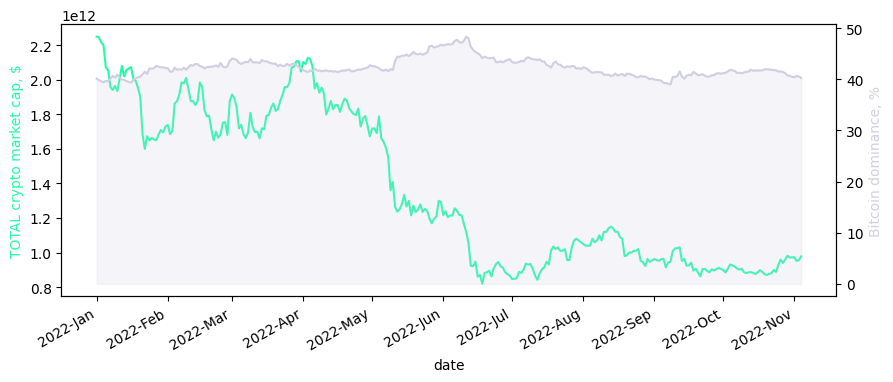

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date


df = pd.read_csv('CRYPTOCAP_TOTAL, 1D (1).csv')
df['time'] = df['time'].apply(lambda x: datetime.fromtimestamp(x))

df = df[df['time'] > datetime.fromisoformat('2022-01-01')]
x = df['time']
y1 = df['close']
y2 = df['BTC.D, CRYPTOCAP: Close'].ffill()

fig, ax1 = plt.subplots(figsize=(10,4))

ax2 = ax1.twinx()
ax1.plot(x, y1, '-', color = (36/255, 251/255, 169/255), zorder = 10)
ax2.plot(x, y2, '-', color = (208/255, 208/255, 208/235),zorder = 1)
ax2.fill_between(x, y2, color = (208/255, 208/255, 208/235), alpha = 0.2)


ax1.set_xlabel('date')

ax1.xaxis_date()

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
fig.autofmt_xdate()

ax1.set_ylabel('TOTAL crypto market cap, $', color= (36/255, 251/255, 169/255))
ax2.set_ylabel('Bitcoin dominance, %', color = (208/255, 208/255, 208/235))